In [1]:
import IPython.display as ipd
test_audio = 'data/iso/iso_1.wav'
ipd.Audio(test_audio)

In [2]:
import librosa
data, sampling_rate = librosa.load(test_audio)
# data - array de audios
# sampling_rate - taxa de amostragem do arquivo extraído, 
#                 número de amostras de áudio transmitidas por segundo, medido em Hz ou kHz.

In [3]:
import os
import pandas as pd
import librosa
import glob 
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(5, 2))
plt.title('Kenzo')
librosa.display.waveplot(data, sr=sampling_rate)
# gera a vizualização da amplitude de onda

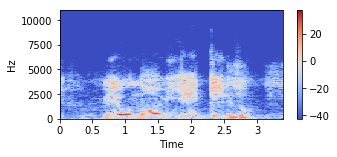

In [4]:
# Short-time Fourier transform
X = librosa.stft(data)
# converte um espectrograma de amplitude em espectrograma em escala de dB
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(5, 2))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()
# representação visual do espectro de freqüências de som ou outros sinais

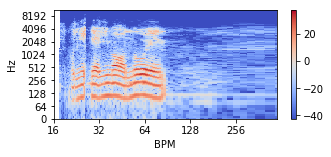

In [5]:
# converte o eixo de freqüência em um logarítmico.

plt.figure(figsize=(5, 2))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis = 'tempo', y_axis = 'log') 
plt.colorbar ()

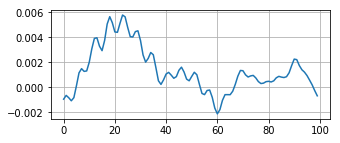

In [6]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(5, 2))
plt.plot(data[n0:n1])
plt.grid()

In [7]:
zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
print(sum(zero_crossings))

4


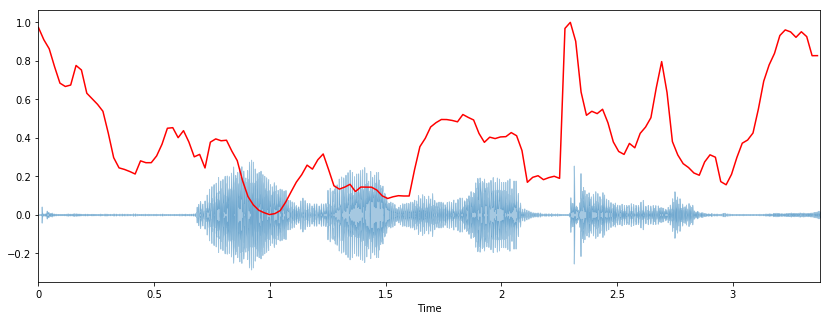

In [8]:
import sklearn

# Spectral Centroid
#
# Indica onde o “centro de massa” de um som está localizado e é 
# calculado como a média ponderada das freqüências presentes no som. 
# Considere duas músicas, uma de um gênero de blues e outra de metal. 
# Agora, em comparação com a música do gênero blues, que é a mesma 
# em toda a sua extensão, a música de metal tem mais freqüências no final. 
# Então, o centróide espectral para a música blues estará em algum lugar 
# perto do meio do seu espectro, enquanto que para uma música de metal estaria no fim.

spectral_centroids = librosa.feature.spectral_centroid(data, sr=sampling_rate)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

#
# não rola
#

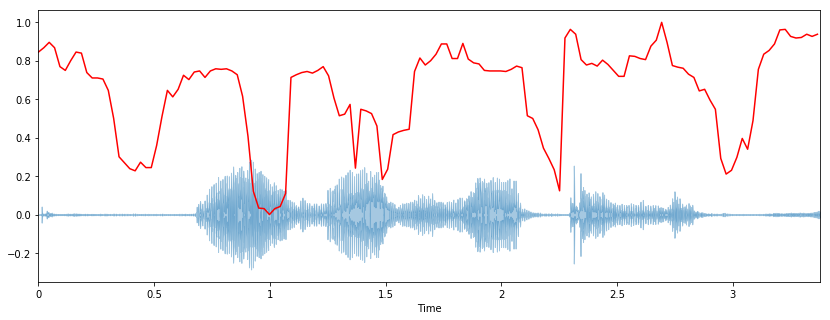

In [9]:
# Rolloff espectral
#
# É uma medida da forma do sinal. Representa a frequência abaixo 
# da qual está uma porcentagem especificada da energia espectral total
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sampling_rate)[0]
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

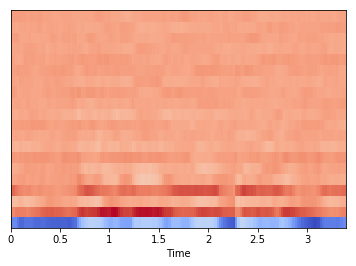

In [10]:
# Mel-Frequency Cepstral Coefficients
#
# Os coeficientes cepstrais da frequência Mel (MFCCs) de um sinal 
# são um pequeno conjunto de características (geralmente cerca de 10–20) 
# que descrevem de forma concisa a forma geral de um envelope espectral. 
# Modela as características da voz humana.

mfccs = librosa.feature.mfcc(data, sr=sampling_rate)

#MFCCs:
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

[ 8.97303540e-17 -6.09862237e-16 -2.95045571e-16  2.01513083e-16
 -2.51701247e-16 -7.22405393e-17  1.26230837e-16 -1.72426761e-16
  7.04155151e-16 -1.00376328e-16  7.36093074e-16  4.98839934e-16
 -3.52742949e-16  2.88676997e-16 -3.98463606e-16 -6.08341383e-18
 -1.07980596e-16  1.18626570e-16 -1.93148389e-16 -1.03037822e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


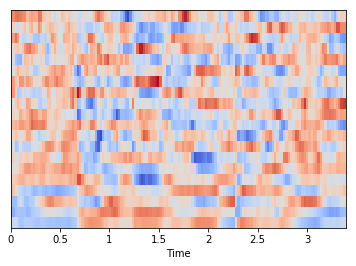

In [11]:
# ?????????

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

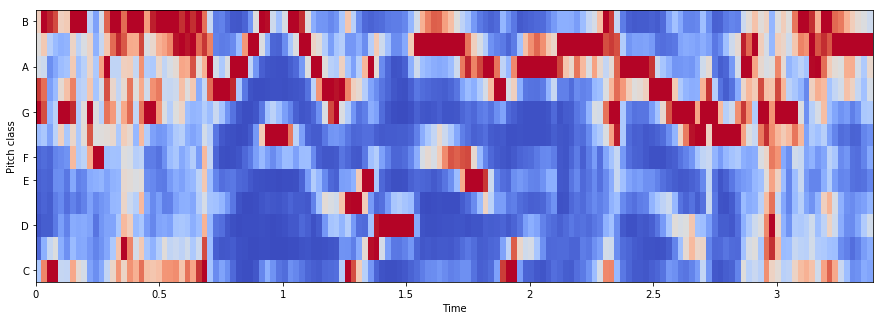

In [12]:
# 

hop_length = 512
chromagram = librosa.feature.chroma_stft(data, sr=sampling_rate, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [13]:
import os

classes = []

# buscando os nomes de todas as classes
for name in os.listdir("data"):
    classes.append(name)
    os.remove(f'csv/data_{name}.csv')

# definindo os dados que serão analisados
header = 'filename chroma_stft spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [14]:
import numpy as np
import csv

print(classes)
for person in classes:
    data_file = f'csv/data_{person}.csv'
    file = open(data_file, 'a', newline='')

    # criando csv para inserção de dados
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
        
    # dados do usuario
    for filename in os.listdir(f'data/{person}'):
        songname = f'data/{person}/{filename}'
        print(songname)
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        # {np.mean(rmse)}
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {person}'
        file = open(data_file, 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
            
    # adiciona dados de treino aleatorios para treinar o modelo
    for filename in os.listdir('data/audio_model'):
        songname = f'data/audio_model/{filename}'
        print(songname)
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        # {np.mean(rmse)}
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {person}'
        file = open(data_file, 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())


['audio_model', 'iso', 'kenzo', 'lucas', 'mari', 'random']
data/audio_model/audio_model_1.wav
data/audio_model/audio_model_2.wav
data/audio_model/audio_model_3.wav
data/audio_model/audio_model_4.wav
data/audio_model/audio_model_5.wav
data/audio_model/audio_model_1.wav
data/audio_model/audio_model_2.wav
data/audio_model/audio_model_3.wav
data/audio_model/audio_model_4.wav
data/audio_model/audio_model_5.wav
data/iso/iso_1.wav
data/iso/iso_2.wav
data/iso/iso_3.wav
data/iso/iso_4.wav
data/audio_model/audio_model_1.wav
data/audio_model/audio_model_2.wav
data/audio_model/audio_model_3.wav
data/audio_model/audio_model_4.wav
data/audio_model/audio_model_5.wav
data/kenzo/kenzo_1.wav
data/kenzo/kenzo_2.wav
data/kenzo/kenzo_3.wav
data/kenzo/kenzo_4.wav
data/audio_model/audio_model_1.wav
data/audio_model/audio_model_2.wav
data/audio_model/audio_model_3.wav
data/audio_model/audio_model_4.wav
data/audio_model/audio_model_5.wav
data/lucas/lucas_1.wav
data/audio_model/audio_model_1.wav
data/audio_mode

In [15]:
datas = []

for person in classes:
    data_file=f'csv/data_{person}.csv'
    data=pd.read_csv(data_file)
    data=data.reindex(np.random.permutation(data.index))
    datas.append(data)    
    
datas[1].head(30)

filename  chroma_stft  spectral_centroid  spectral_bandwidth  \
6  audio_model_3.wav     0.337822        1642.704587         1621.428939   
4  audio_model_1.wav     0.327557        1433.488230         1521.139917   
7  audio_model_4.wav     0.395064        1640.739905         1651.509843   
8  audio_model_5.wav     0.208881        1410.527414         1536.097156   
2          iso_3.wav     0.396342        1851.645411         1574.900401   
0          iso_1.wav     0.351770        1790.495449         1521.224481   
5  audio_model_2.wav     0.343563        1748.102910         1598.618272   
3          iso_4.wav     0.430343        1973.483166         1577.560136   
1          iso_2.wav     0.375767        1677.588614         1578.499981   

       rolloff  zero_crossing_rate       mfcc1       mfcc2      mfcc3  \
6  3198.731064            0.071995 -379.478835  109.405760 -19.443095   
4  2768.607122            0.077376 -329.973981  146.095272 -17.501039   
7  3387.036133            0.094352 -385.627117  138.297556 -29.113932   
8  2702.299964            0.062712 -345.128976  123.609970 -19.893582   
2  3649.124268            0.121558 -402.663640   97.793646 -12.541896   
0  3551.872358            0.114358 -372.709669  117.459630 -20.468130   
5  3176.541361            0.091961 -376.759865  110.450077 -24.674732   
3  3833.917868            0.136668 -346.978518  116.385756 -43.910022   
1  3396.153773            0.101791 -411.831506  109.181069  -5.202723   

       mfcc4  ...     mfcc12     mfcc13     mfcc14    mfcc15    mfcc16  \
6  28.319231  ...  -2.737981  -7.978823  -1.880292 -5.514852 -8.438549   
4  45.368804  ...  -5.163545  -3.085542   1.720315 -3.309031 -7.250034   
7  19.272897  ...  10.303681 -12.414435   3.790007  4.446434 -8.328802   
8  23.716351  ... -12.342787 -11.544513  -7.808680  1.189393  2.031121   
2  59.996290  ...   6.071406   0.403362 -16.077991  5.439054  2.796180   
0  76.089219  ...  -5.035765   2.422870  -9.408476  3.918476  2.462849   
5  32.120481  ...  -7.799501  -4.224613   1.867320 -7.734318 -8.961747   
3  60.107786  ...   3.881242  -2.364456 -10.748121  3.741002  0.969907   
1  63.947246  ...   0.714344   1.904916 -14.275556  3.924950  1.897285   

      mfcc17     mfcc18     mfcc19    mfcc20  label  
6  -4.495092  -5.995173  -4.759895 -6.920408    iso  
4   0.821573  -4.904636  -0.989260 -6.836678    iso  
7  -3.377138  -4.864827  -5.531277  1.047882    iso  
8  10.641271  12.371614  10.959433  6.801921    iso  
2  -6.480996  -1.491796  -6.871758 -4.655900    iso  
0  -6.535806  -1.938193  -5.717318 -3.177982    iso  
5  -2.305250 -10.141938  -7.038889 -2.895510    iso  
3  -2.436796  -2.930072 -10.952654 -1.630938    iso  
1  -4.321095  -2.405358  -7.487377 -1.490098    iso  

[9 rows x 27 columns]

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

model_train = {}

class ModelTrain(object):
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

for person in classes:
    genre_list = data.iloc[:, -1]
    encoder = LabelEncoder()
    y = encoder.fit_transform(genre_list)
    
    scaler = StandardScaler()
    X = scaler.fit_transform(np.array(data.iloc[:, 1:-1], dtype = float))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = ModelTrain(X_train, X_test, y_train, y_test)
    model_train[person] = model

In [17]:
for person in classes:
    print(model_train[person].__dict__)

{'X_train': array([[ 0.37053551,  1.45399529,  0.20188696,  0.45083475,  0.95481883,
        -0.59789224, -1.25868478, -0.41888638,  0.55584716, -0.0264065 ,
        -1.70733258, -0.01660929,  1.73877894,  0.22979168,  0.49098109,
         0.3584323 , -0.55803341,  1.303692  ,  0.58911888, -1.56302439,
        -0.77904604, -0.57313016, -1.08611309, -0.92515638, -0.5193366 ],
       [ 0.29137689,  0.63504053,  0.63794322,  0.52751492, -0.55707743,
        -0.72490444, -1.33758722,  0.75308705,  0.10841732,  1.03623448,
        -0.06314121,  0.19766717,  0.85424675,  0.06898488,  0.46672131,
        -0.78188655,  0.00983077,  0.28508746, -0.20745486, -1.06595734,
        -0.66709794, -0.92901464, -0.60082409, -0.61339398, -1.2768567 ],
       [ 0.14983552, -0.99059   , -1.2792149 , -0.95884906, -0.14958935,
         1.58763362,  1.43445742,  1.18813993,  2.11525372,  1.803027  ,
        -0.0698706 , -1.17174111,  0.28888519, -1.08193285,  1.02811207,
        -0.17954966, -0.26229907,  1.

In [18]:
from keras import models, layers

model = {}

for person in classes:
    model[person] = models.Sequential()

    model[person].add(layers.Dense(128, activation='relu', input_shape=(model_train[person].X_train.shape[1],)))

    model[person].add(layers.Dense(64, activation='relu'))

    model[person].add(layers.Dense(32, activation='relu'))

    model[person].add(layers.Dense(2, activation='softmax'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [19]:
for person in classes:
    model[person].compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

In [20]:
for person in classes:
    model[person].summary()
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3328      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 13,730
Trainable params: 13,730
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               3328      
_________________________________________________________________
dense_

In [21]:
history = {}

for person in classes:    
    history[person] = model[person].fit(model_train[person].X_train,
                    model_train[person].y_train,
                    validation_data=[model_train[person].X_test, model_train[person].y_test],
                    batch_size=128,
                    epochs=4,
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 5 samples, validate on 2 samples
Epoch 1/4
5/5 [==============================] - 1s 188ms/step - loss: 0.7760 - acc: 0.4000 - val_loss: 0.8165 - val_acc: 0.0000e+00
Epoch 2/4
5/5 [==============================] - 0s 3ms/step - loss: 0.6653 - acc: 0.6000 - val_loss: 0.7167 - val_acc: 0.5000
Epoch 3/4
5/5 [==============================] - 0s 634us/step - loss: 0.5725 - acc: 0.8000 - val_loss: 0.6482 - val_acc: 0.5000
Epoch 4/4
5/5 [==============================] - 0s 692us/step - loss: 0.5027 - acc: 0.8000 - val_loss: 0.5940 - val_acc: 1.0000
Train on 5 samples, validate on 2 samples
Epoch 1/4
5/5 [==============================] - 1s 118ms/step - loss: 0.7582 - acc: 0.4000 - val_loss: 0.7373 - val_acc: 0.5000
Epoch 2/4
5/5 [==============================] - 0s 2ms/step - loss: 0.5990 - acc: 0.8000 - val_loss: 0.6252 - val_acc: 0.5000
Epoch 3/4
5/5 [==============================] - 0s 488us/step - loss: 0.4833 - acc: 0.8000 - 

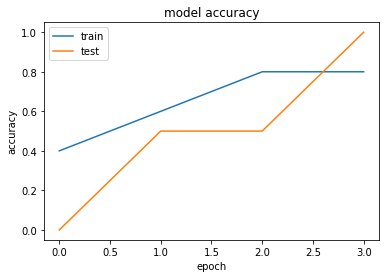

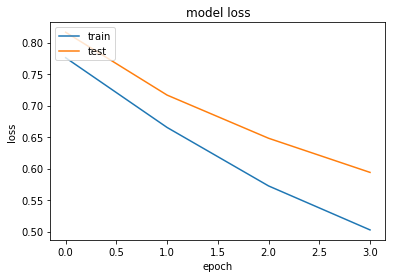

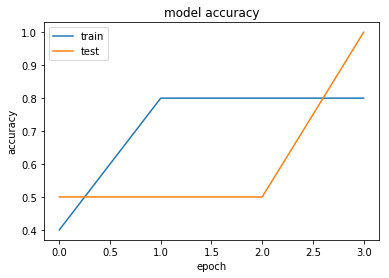

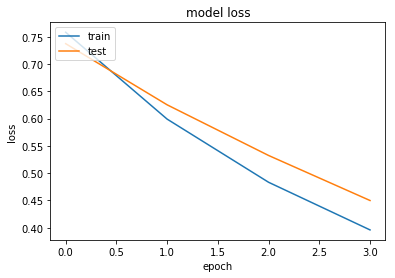

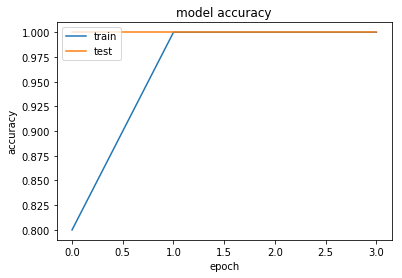

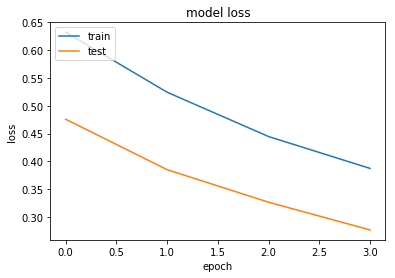

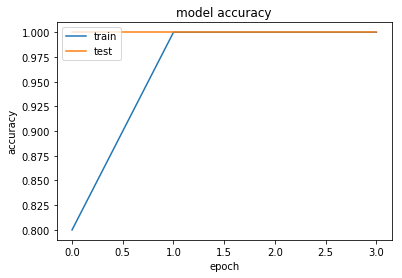

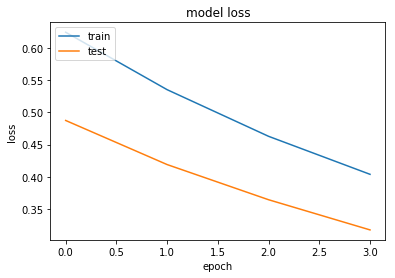

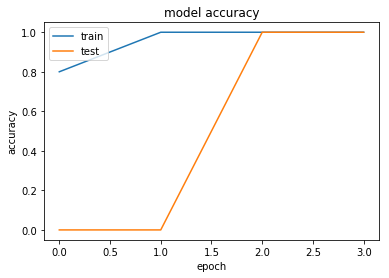

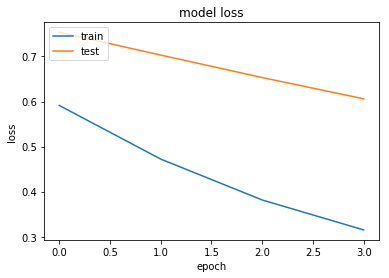

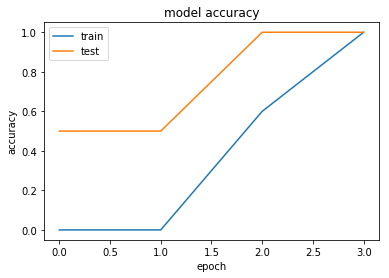

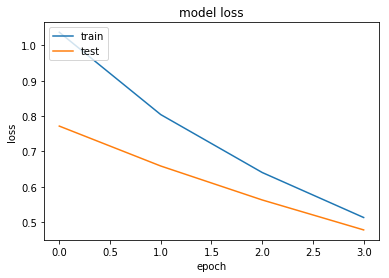

In [22]:
for person in classes:
    print(history[person])
    plt.plot(history[person].history['acc'])
    plt.plot(history[person].history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history[person].history['loss'])
    plt.plot(history[person].history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()